# Project: Forecast & Prediction:
# The gym chain Model Fitness

As an data analyst i have to find out the reason for the  churn for the gym chain Model Fitness and to come up with customer retention strategy.

In [1]:
#import packages
import warnings
warnings.filterwarnings("ignore")

import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from pylab import rcParams
import plotly.graph_objs as go
import plotly.offline as pyoff


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist



## Step 1 Download the data

In [2]:
#import file SomervilleHappinessSurvey2015.csv

try: 
    df = pd.read_csv('C:/Users/andre/OneDrive/Desktop/practicum_100/project_3/gym_churn_us.csv')
except:
    df = pd.read_csv('/datasets/gym_churn_us.csv')
    

## Step 2. Carry out exploratory data analysis (EDA)

Check for missing values and data types. Correct the data if needed


In [3]:
#check datafile via info, head, tail and sample & datatypes
print('Info about df')
display(df.info())
print()
print('first 5 rows of df')
display(df.head())
print()
print('last 5 rows of  df')
display(df.tail())
print()
print('sample rows df')
display(df.sample(5))

Info about df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 no

None


first 5 rows of df


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0


last 5 rows of  df


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
3995         8                   2.284497                           2.349070   
3996         1                   1.277168                           0.292859   
3997         2                   2.786146                           2.831439   
3998         3                   1.630108                           1.596237   
3999         1                   1.101832                           1.035270   

      Churn  
3995      0  
3996      1  
3997      0  
3998      0  
3999      0


sample rows df


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
2095       0              1        0              0      0               12   
3186       1              1        0              0      1                1   
1362       0              1        0              0      1                1   
309        1              1        1              0      1                6   
3436       0              0        0              0      1                6   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
2095             1   35                    131.796279                    8.0   
3186             0   25                    108.829617                    1.0   
1362             1   29                    264.605514                    1.0   
309              0   33                     76.695751                    4.0   
3436             0   34                    326.204598                    5.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
2095        11                   4.793780                           4.729706   
3186         0                   0.357429                           0.010516   
1362         0                   2.355563                           2.372330   
309          7                   3.487659                           3.445423   
3436         2                   1.099334                           1.051872   

      Churn  
2095      0  
3186      1  
1362      0  
309       0  
3436      0

In [4]:
df.describe(include='all').round(2)

gender  Near_Location  Partner  Promo_friends   Phone  \
count  4000.00        4000.00  4000.00        4000.00  4000.0   
mean      0.51           0.85     0.49           0.31     0.9   
std       0.50           0.36     0.50           0.46     0.3   
min       0.00           0.00     0.00           0.00     0.0   
25%       0.00           1.00     0.00           0.00     1.0   
50%       1.00           1.00     0.00           0.00     1.0   
75%       1.00           1.00     1.00           1.00     1.0   
max       1.00           1.00     1.00           1.00     1.0   

       Contract_period  Group_visits      Age  Avg_additional_charges_total  \
count          4000.00       4000.00  4000.00                       4000.00   
mean              4.68          0.41    29.18                        146.94   
std               4.55          0.49     3.26                         96.36   
min               1.00          0.00    18.00                          0.15   
25%               1.00          0.00    27.00                         68.87   
50%               1.00          0.00    29.00                        136.22   
75%               6.00          1.00    31.00                        210.95   
max              12.00          1.00    41.00                        552.59   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
count                4000.00   4000.00                    4000.00   
mean                    4.32      3.72                       1.88   
std                     4.19      3.75                       0.97   
min                     1.00      0.00                       0.00   
25%                     1.00      1.00                       1.18   
50%                     1.00      3.00                       1.83   
75%                     6.00      5.00                       2.54   
max                    12.00     31.00                       6.02   

       Avg_class_frequency_current_month    Churn  
count                            4000.00  4000.00  
mean                                1.77     0.27  
std                                 1.05     0.44  
min                                 0.00     0.00  
25%                                 0.96     0.00  
50%                                 1.72     0.00  
75%                                 2.51     1.00  
max                                 6.15     1.00

In [5]:
duplicate = df.duplicated(keep=False).value_counts(normalize=True) * 100
print(duplicate.round(2))


False    100.0
dtype: float64


In [6]:
missing = df.isna().sum()
print(missing.round(2))

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [7]:
# change columns into lowercase letters

df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [8]:
#average parameters for each churn
churn_mean = df.groupby(['churn']).mean().reset_index()

display(churn_mean.round(2))

churn  gender  near_location  partner  promo_friends  phone  \
0      0    0.51           0.87     0.53           0.35    0.9   
1      1    0.51           0.77     0.36           0.18    0.9   

   contract_period  group_visits    age  avg_additional_charges_total  \
0             5.75          0.46  29.98                        158.45   
1             1.73          0.27  26.99                        115.08   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0                   5.28      4.71                       2.02   
1                   1.66      0.99                       1.47   

   avg_class_frequency_current_month  
0                               2.03  
1                               1.04

The remaining clients are locals and get a contract via partner business, with a contract period of nearly 6 month and is around 30 years olt. Additional charges are made around 158,-- and the client has a remaining contract duration of a bit more than 5 month with a lifetime of more than 4.5 months and visits the gyms around twice the week and was twice the month before. 

The leaving clients are locals with a contract period of a bit more than 1.5 month and are around 27 years. Additional charges  are made around 115,-- and the client has a remaining contract duration of bit more than 1.5 months with a lifetime of 1 month. The visit frequency is around one and a half times per week and was 1 time the month before. 

In [9]:
#create new df for each churn - print shape and drop binary parameters
churn_0=df[df.churn == 0].drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn'], axis = 1)
churn_1=df[df.churn == 1].drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn'], axis = 1)
df_nb = df.drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'], axis = 1)
display(churn_0.shape)
display(churn_1.shape)


(2939, 7)

(1061, 7)

In [10]:
for i in churn_0.columns:
        plot_data = [
            go.Histogram(
                x=churn_0[i])]

        plot_layout = go.Layout(
                title=i,
                yaxis_title='number of users',
                xaxis_title=i
                )
        fig = go.Figure(data=plot_data, layout=plot_layout)
        pyoff.iplot(fig)

In [11]:
for i in churn_1.columns:
        plot_data = [
            go.Histogram(
                x=churn_1[i])]

        plot_layout = go.Layout(
                title=i,
                yaxis_title='number of users',
                xaxis_title=i
                )
        fig = go.Figure(data=plot_data, layout=plot_layout)
        pyoff.iplot(fig)



There is nearly no difference in gender(50/50), location - a lot of people are locals, provided phone number and age (second half of the twenties)

Close to the double number of people, who stays are from a partner company or promo friends and prefer group visits than people, who left the gym. The average over the preceeding month is the double and the average frequency in a week over the lifetime is on third higher, the same applies to the average addictional charges. 
There also exist a  big difference in the time since the customer first visit (in month) and the months remaining until the contract expires.

This datas are backed up by the distribution by comparing the people who stays and who quit the gym. The contact period is shorter by the second one and therea are shorter period of time to end contract. The visting frequence is lower in the former month and in average every week.

In [12]:
#to find out the correlation between the features
corr = df.corr()
display(corr. round(2))

gender  near_location  partner  \
gender                               1.00           0.01    -0.01   
near_location                        0.01           1.00    -0.01   
partner                             -0.01          -0.01     1.00   
promo_friends                       -0.01           0.21     0.45   
phone                               -0.01          -0.02     0.01   
contract_period                      0.00           0.15     0.31   
group_visits                         0.02           0.15     0.02   
age                                  0.01           0.06     0.05   
avg_additional_charges_total        -0.01           0.04     0.02   
month_to_end_contract               -0.00           0.14     0.29   
lifetime                             0.01           0.07     0.06   
avg_class_frequency_total            0.01           0.04     0.02   
avg_class_frequency_current_month    0.01           0.06     0.05   
churn                                0.00          -0.13    -0.16   

                                   promo_friends  phone  contract_period  \
gender                                     -0.01  -0.01             0.00   
near_location                               0.21  -0.02             0.15   
partner                                     0.45   0.01             0.31   
promo_friends                               1.00   0.00             0.24   
phone                                       0.00   1.00            -0.01   
contract_period                             0.24  -0.01             1.00   
group_visits                                0.12  -0.01             0.17   
age                                         0.05  -0.01             0.14   
avg_additional_charges_total                0.04   0.01             0.11   
month_to_end_contract                       0.24  -0.01             0.97   
lifetime                                    0.07  -0.02             0.17   
avg_class_frequency_total                   0.03   0.01             0.10   
avg_class_frequency_current_month           0.05   0.01             0.16   
churn                                      -0.16  -0.00            -0.39   

                                   group_visits   age  \
gender                                     0.02  0.01   
near_location                              0.15  0.06   
partner                                    0.02  0.05   
promo_friends                              0.12  0.05   
phone                                     -0.01 -0.01   
contract_period                            0.17  0.14   
group_visits                               1.00  0.08   
age                                        0.08  1.00   
avg_additional_charges_total               0.03  0.08   
month_to_end_contract                      0.16  0.13   
lifetime                                   0.08  0.16   
avg_class_frequency_total                  0.06  0.12   
avg_class_frequency_current_month          0.08  0.18   
churn                                     -0.18 -0.40   

                                   avg_additional_charges_total  \
gender                                                    -0.01   
near_location                                              0.04   
partner                                                    0.02   
promo_friends                                              0.04   
phone                                                      0.01   
contract_period                                            0.11   
group_visits                                               0.03   
age                                                        0.08   
avg_additional_charges_total                               1.00   
month_to_end_contract                                      0.11   
lifetime                                                   0.08   
avg_class_frequency_total                                  0.04   
avg_class_frequency_current_month                          0.08   
churn                                                     -0.20 

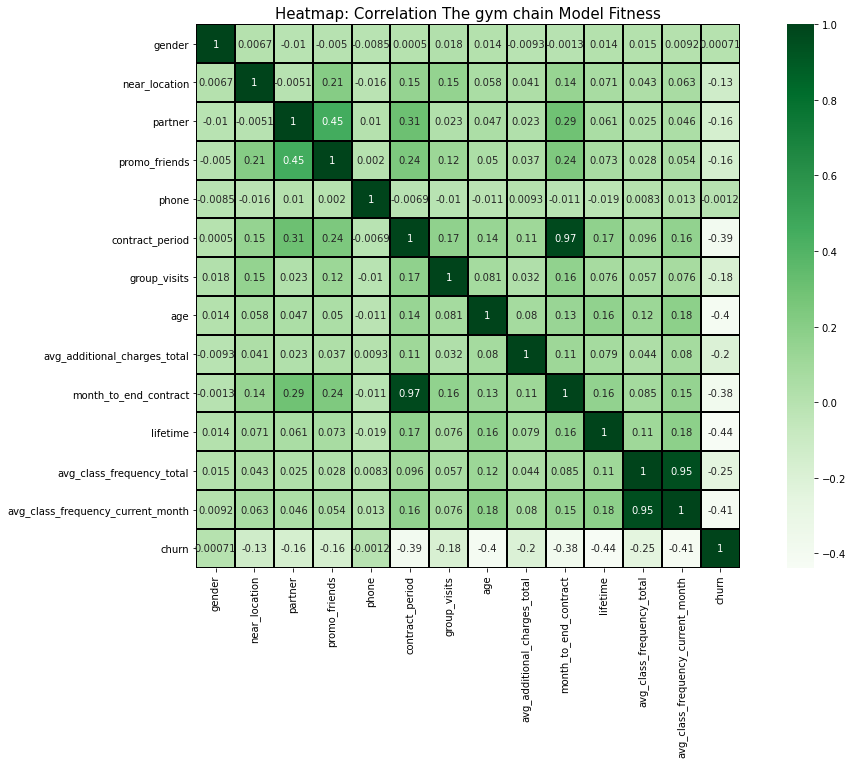

In [13]:
#create heatmap
plt.figure(figsize=(17, 10))

sns.heatmap(corr, annot=True, fmt='.2g', cmap= 'Greens', linewidths=1, linecolor='black',square=True)
plt.title("Heatmap: Correlation The gym chain Model Fitness", fontsize = 15)

plt.show()

In [14]:
# drop  'month_to_end_contract' and 'avg_class_frequency_current_month because 
#there have a correation close to 1 with 'avg_class_frequency_total' and 'current_period'
#create df_1
df_1 = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)
df_1.shape

(4000, 12)

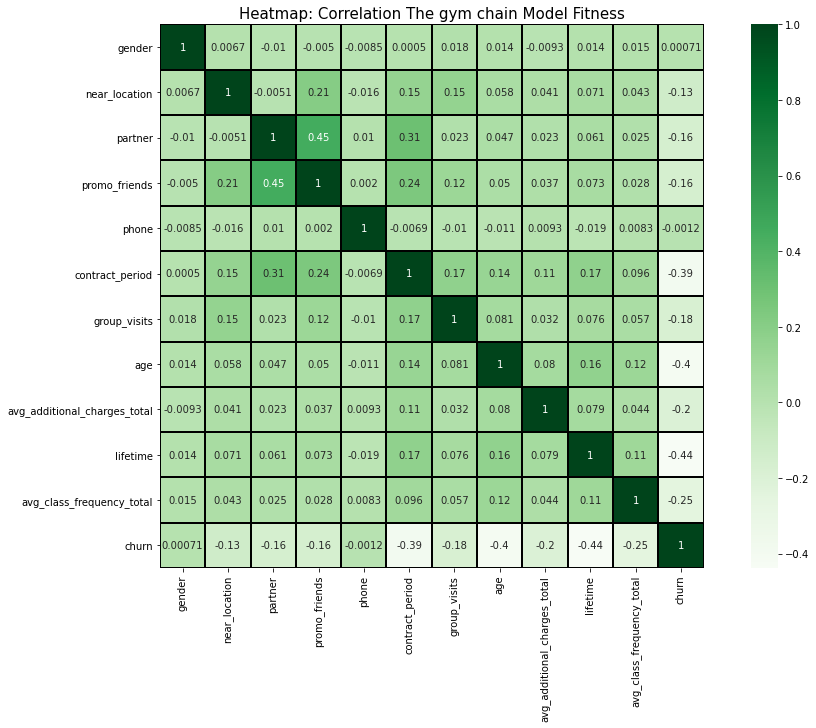

In [15]:
#create heatmap for correlation of df_1
plt.figure(figsize=(17, 10))

sns.heatmap(df_1.corr(), annot=True, fmt='.2g', cmap= 'Greens', linewidths=1, linecolor='black',square=True)
plt.title("Heatmap: Correlation The gym chain Model Fitness", fontsize = 15)

plt.show()

#### Dataframe consits of:
> 4000 entries                                                          
14 columns 


#### columns & data types :
>  gender - int64                                                            
    Near_Location  -  int64                                                    
    Partner - int64                                                            
    Promo_friends - int64                                                     
    Phone  - int64                                                             
    Contract_period -int64                                                     
    Group_visits - int64                                                       
    Age -int64                                                                 
    Avg_additional_charges_total - float64                                    
    Month_to_end_contract - float64                                            
   Lifetime  -  int64                                                          
   Avg_class_frequency_total - float64                                       
   Avg_class_frequency_current_month - float64                                 
   Churn - int64 
   
##### no missing data & no corrupted data are found

##### no duplicates are found

##### change columns into lowercase letters

##### mean feature values in two groups
The remaining clients are locals and get a contract via partner business, with a contract period of nearly 6 month and is around 30 years olt. Additional charges are made around 158,-- and the client has a remaining contract duration of a bit more than 5 month with a lifetime of more than 4.5 months and visits the gyms around twice the week and was twice the month before. 

The leaving clients are locals with a contract period of a bit more than 1.5 month and are around 27 years. Additional charges  are made around 115,-- and the client has a remaining contract duration of bit more than 1.5 months with a lifetime of 1 month. The visit frequency is around one and a half times per week and was 1 time the month before. 


There is nearly no difference in gender(50/50), location - a lot of people are locals, provided phone number and age (second half of the twenties)

Close to the double number of people, who stays are from a partner company or promo friends and prefer group visits than people, who left the gym. The average over the preceeding month is the double and the average frequency in a week over the lifetime is on third higher, the same applies to the average addictional charges. 
There also exist a  big difference in the time since the customer first visit (in month) and the months remaining until the contract expires.

This datas are backed up by the distribution by comparing the people who stays and who quit the gym. The contact period is shorter by the second one and therea are shorter period of time to end contract. The visting frequence is lower in the former month and in average every week.

##### Correlation
find out the correlation between the features  - 'contract_period' & 'month_to_end_contract' (0.97); 'avg_class_frequency_total' & 'avg_class_frequency_current_month' (0.95) - drop  'month_to_end_contract' and 'avg_class_frequency_current_month'

## Step 3. Build a model to predict user churn


In [16]:
#attributs are assigned to x and y 

y = df_1['churn']
X = df_1.drop(['churn'], axis = 1) 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
log_model = LogisticRegression()
#train your model
log_model.fit(X_train, y_train)
# use the trained model to make forecasts
log_probabilities_test = log_model.predict_proba(X_test)[:,1]
log_predictions_test = log_model.predict(X_test)
print('Logistic Regression metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_predictions_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_predictions_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_predictions_test)))

Logistic Regression metrics
Accuracy: 0.87
Precision: 0.73
Recall: 0.77


In [19]:
rf_model = RandomForestClassifier()

#train your model
rf_model.fit(X_train, y_train)
# use the trained model to make forecasts
rf_probabilities_test = rf_model.predict_proba(X_test)[:,1]
rf_predictions_test = rf_model.predict(X_test)

print('Random Forest Classifier- metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions_test)))

Random Forest Classifier- metrics
Accuracy: 0.89
Precision: 0.80
Recall: 0.75


In [20]:
print('Random Forest Classifier - importance parameters')
display(pd.DataFrame(rf_model.feature_importances_, index = X_test.columns, columns=['importance']).sort_values('importance',ascending=False))


Random Forest Classifier - importance parameters


importance
lifetime                        0.332232
avg_class_frequency_total       0.166573
age                             0.154356
avg_additional_charges_total    0.134086
contract_period                 0.113508
group_visits                    0.022526
partner                         0.017991
gender                          0.017291
promo_friends                   0.016749
near_location                   0.014008
phone                           0.010680

### attributs are assigned to x and y 
y=churn & x = everything except churn  and split into train and test (ratio 0.8 to 0.2)                                         

Logistic Regression metrics
Accuracy: 0.87
Precision: 0.73
Recall: 0.77

Random Forest Classifier- metrics
Accuracy: 0.90
Precision: 0.82
Recall: 0.79

The model Randoom Forest Classifier is more accurate to make a prediction for the dataframe used. 'lifetime' (0.33) has the highest influence on the model of the Random Forest Classifier, nearly half of the influence on our model have following attributes 'avg_class_frequency_total'	(0.17), 'age' (0.15), 'avg_additional_charges_total' (0.13) and 'contract_period' (0.11). The attributes left have nearly no influence on our model.



## Step 4. Create user clusters

In [21]:
#create two datasets for churn = 0, and churn= 1 and creating a X and y for each of them
churn_0=df_1[df_1.churn == 0]
churn_1=df_1[df_1.churn == 1]
y0 = churn_0['churn']
X0 = churn_0.drop(['churn'], axis = 1)
y1 = churn_1['churn']
X1 = churn_1.drop(['churn'], axis = 1)


In [22]:
#Standardization of X, creating linkage for clustering
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X0_sc = sc.fit_transform(X0)
X1_sc = sc.fit_transform(X1)

linked = linkage(X_sc, method = 'ward') 
linked0 = linkage(X0_sc, method = 'ward') 
linked1 = linkage(X1_sc, method = 'ward') 



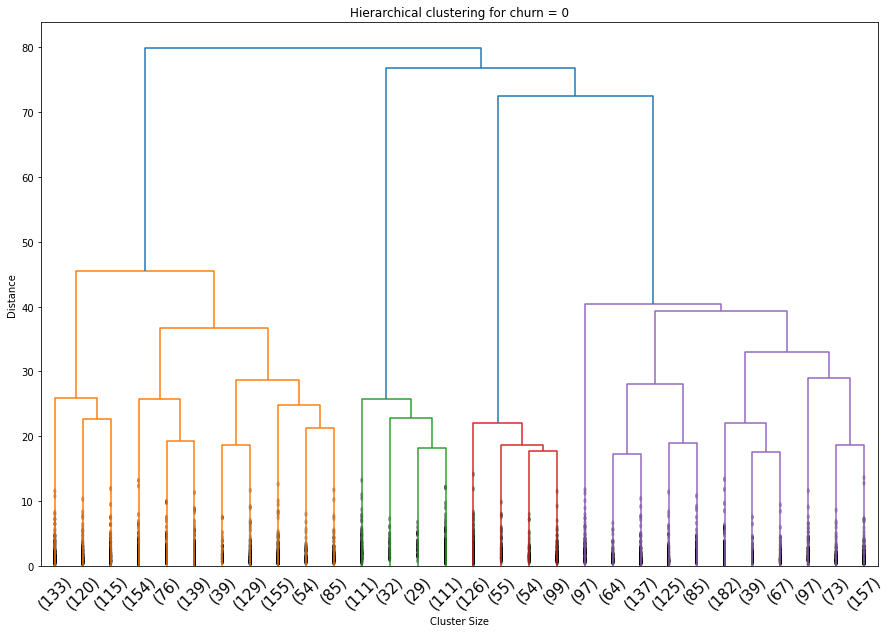

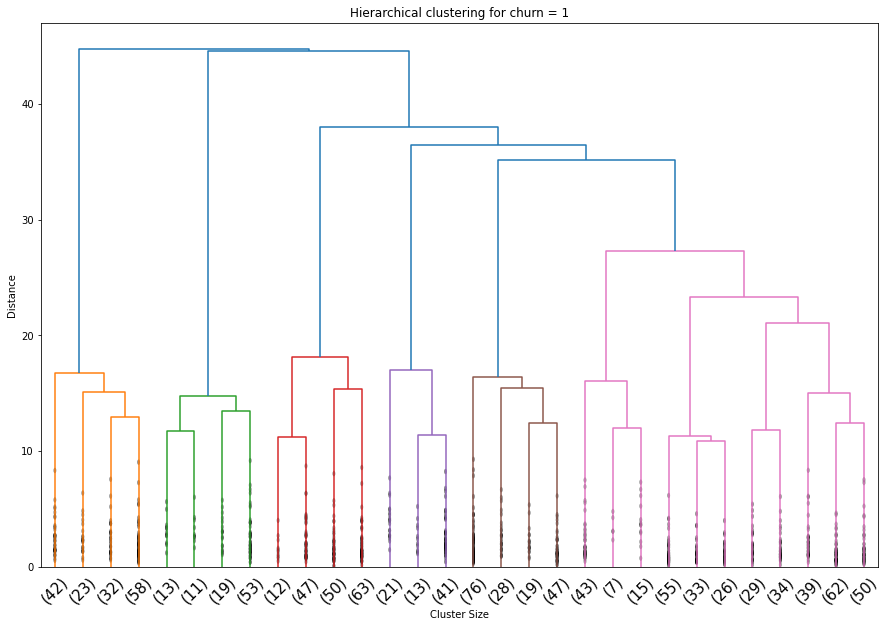

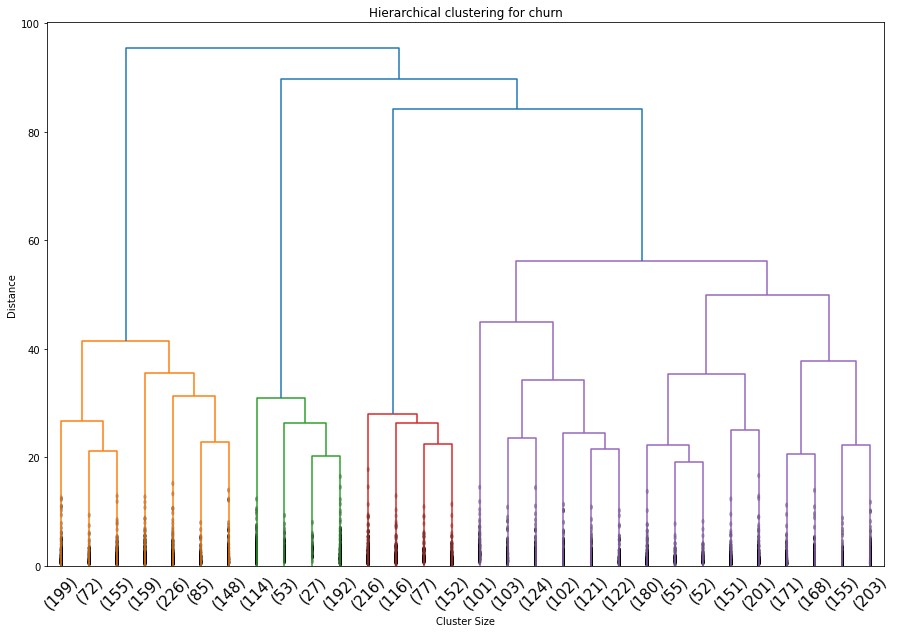

In [23]:
#dendogram for df_1, churn0, churn1
plt.figure(figsize=(15, 10))  
dendrogram(linked0, truncate_mode='lastp', orientation='top', leaf_rotation = 45., leaf_font_size=15, show_contracted=True)
plt.title('Hierarchical clustering for churn = 0')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(15, 10))  
dendrogram(linked1, truncate_mode='lastp', orientation='top', leaf_rotation = 45., leaf_font_size=15, show_contracted=True)
plt.title('Hierarchical clustering for churn = 1')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()  

plt.figure(figsize=(15, 10))  
dendrogram(linked, truncate_mode='lastp', orientation='top', leaf_rotation = 45., leaf_font_size=15, show_contracted=True)
plt.title('Hierarchical clustering for churn')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show() 

Created 3 Dendograms with hierachial clustering for customer staying (churn=0) & leaving (churn=1)the gym and both of them together. I made a dendogram to find out, if there are any difference in the number of clustering (mainly: because in our task it is written down to use 5 clusters and i've got only 4). Therefore i clustered multiple times. 

The hierachial clustering for churn = 0 shows 4 clusters, and for costumers leaving 6 clusters and for both combined 4 clusters again. The reason might be that the number of people who stays are much more higher than those who left. 


In [24]:
#clustering
model = KMeans(n_clusters=5, random_state=0).fit(X_sc)

#print labels
print('labels')
print(model.labels_)
print()
# Obtaining cluster centroids
print("Cluster centroids:")
centers=model.cluster_centers_
print(centers)
print()
# objective function value
print('Objectice function value')
print(model.inertia_)


labels
[4 2 3 ... 1 1 4]

Cluster centroids:
[[-0.01513645 -2.33709981  0.0068244  -0.49751216  0.32681319 -0.36957558
  -0.3650495  -0.14605525 -0.09921303 -0.19141985 -0.11403926]
 [-0.04489968  0.41750558  0.91612755  1.24328063  0.32681319  0.65715357
   0.22400482  0.08971806  0.02620211  0.08918843  0.03355214]
 [ 0.10056803  0.418835   -0.44148492 -0.55932208  0.32681319  0.12040913
   0.2480522   0.54695092  0.41094252  0.54700316  0.53519141]
 [-0.04289707  0.42788074 -0.5259235  -0.49625844  0.32681319 -0.57135241
  -0.25570753 -0.49348598 -0.31562098 -0.47749931 -0.42251698]
 [ 0.02613762  0.04823315 -0.03050553 -0.00606338 -3.05985201  0.02109237
   0.03090189  0.03489222 -0.02839369  0.05752897 -0.02552059]]

Objectice function value
29690.375749868304


In [25]:
#add label with the labels to df_1
df_1['label'] = model.labels_.astype(str)
display(df_1.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
       'churn', 'label'],
      dtype='object')

In [26]:
#Look at the mean feature values for clusters. Does anything catch your eye?
df_label= df_1.groupby(['label']).mean()
display(df_label)


gender  near_location   partner  promo_friends  phone  \
label                                                            
0      0.502683       0.000000  0.490161       0.078712    1.0   
1      0.486867       0.996248  0.943715       0.883677    1.0   
2      0.561614       0.996728  0.267176       0.050164    1.0   
3      0.488806       1.000000  0.223881       0.078358    1.0   
4      0.523316       0.862694  0.471503       0.305699    0.0   

       contract_period  group_visits        age  avg_additional_charges_total  \
label                                                                           
0             3.000000      0.232558  28.708408                    137.385192   
1             7.660413      0.523452  29.474672                    149.409166   
2             5.241003      0.533261  30.958561                    186.697490   
3             2.082090      0.286381  27.584888                    116.455656   
4             4.777202      0.427461  29.297927                    144.208179   

       lifetime  avg_class_frequency_total     churn  
label                                                 
0      3.007156                   1.768159  0.400716  
1      4.057223                   1.912481  0.117261  
2      5.778626                   2.400164  0.023991  
3      1.933769                   1.466695  0.547575  
4      3.940415                   1.854211  0.266839

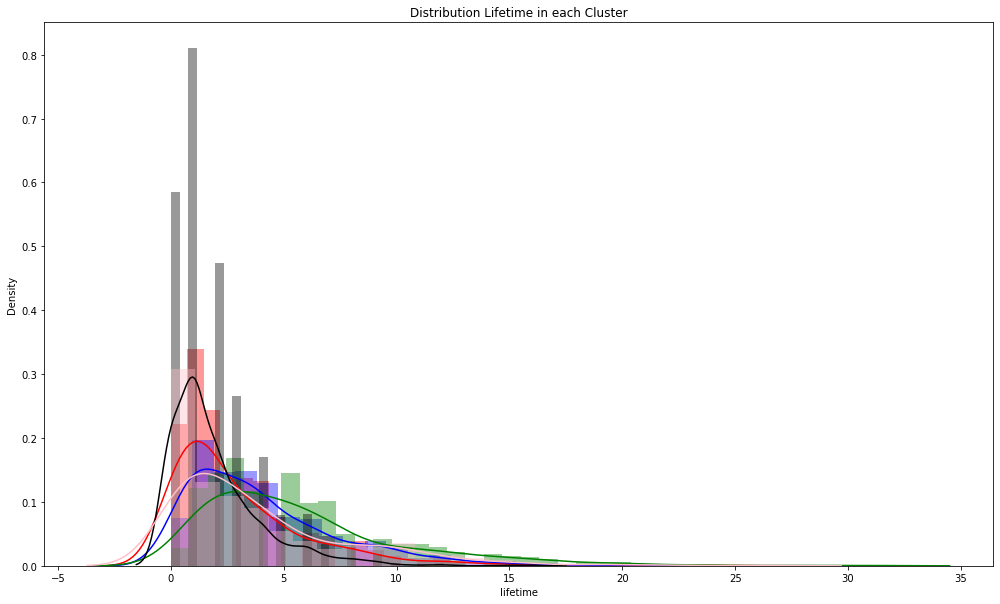

In [27]:
plt.figure(figsize=(17, 10))
plt.title ('Distribution Lifetime in each Cluster')
sns.distplot(df_1[df_1['label'] == '0']['lifetime'], color = 'Red')
sns.distplot(df_1[df_1['label'] == '1']['lifetime'], color = 'Blue')
sns.distplot(df_1[df_1['label'] == '2']['lifetime'], color = 'Green')
sns.distplot(df_1[df_1['label'] == '3']['lifetime'], color = 'Black')
sns.distplot(df_1[df_1['label'] == '4']['lifetime'], color = 'Pink')
plt.show()


The density of the lifetime is the highest in the 4th cluster with the label 3 by around 2 months. In contrast to label 2 with the highest density at about 5 months. 

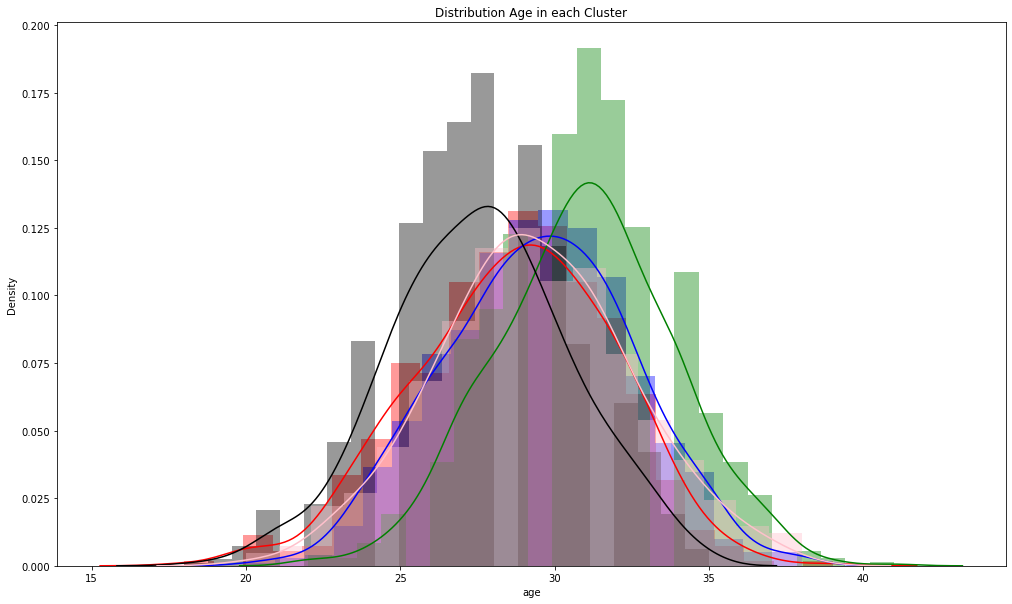

In [28]:
plt.figure(figsize=(17, 10))
plt.title ('Distribution Age in each Cluster')
sns.distplot(df_1[df_1['label'] == '0']['age'], color = 'Red')
sns.distplot(df_1[df_1['label'] == '1']['age'], color = 'Blue')
sns.distplot(df_1[df_1['label'] == '2']['age'], color = 'Green')
sns.distplot(df_1[df_1['label'] == '3']['age'], color = 'Black')
sns.distplot(df_1[df_1['label'] == '4']['age'], color = 'Pink')
plt.show()

The distribution in age is very similar in all of the clusters, with tiny differences of +-5 years.

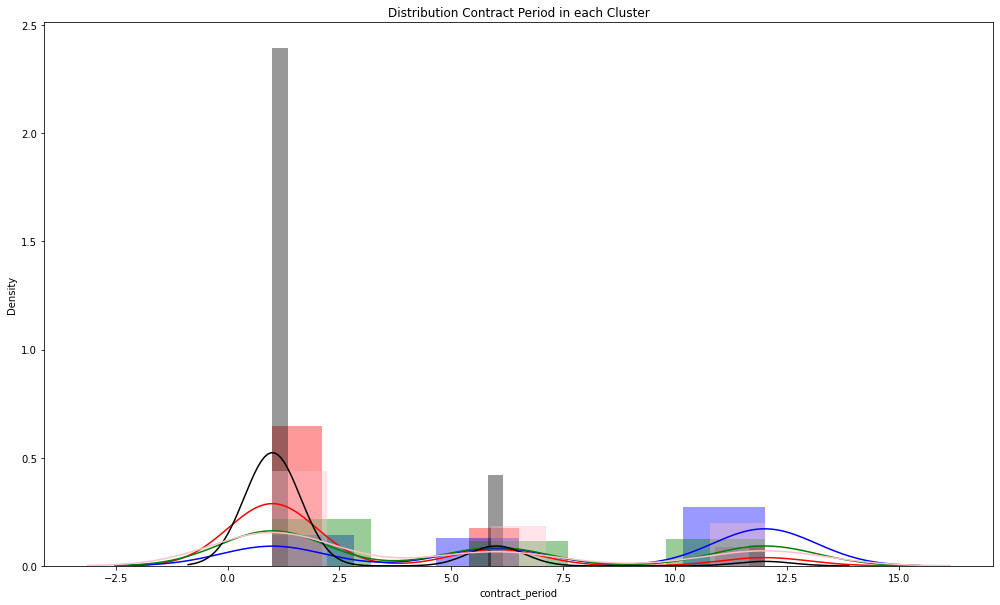

In [29]:
plt.figure(figsize=(17, 10))
plt.title ('Distribution Contract Period in each Cluster')
sns.distplot(df_1[df_1['label'] == '0']['contract_period'], color = 'Red')
sns.distplot(df_1[df_1['label'] == '1']['contract_period'], color = 'Blue')
sns.distplot(df_1[df_1['label'] == '2']['contract_period'], color = 'Green')
sns.distplot(df_1[df_1['label'] == '3']['contract_period'], color = 'Black')
sns.distplot(df_1[df_1['label'] == '4']['contract_period'], color = 'Pink')
plt.show()

The highest density for contract period is found in the cluster with the label 3 with a contract period of about 1 month

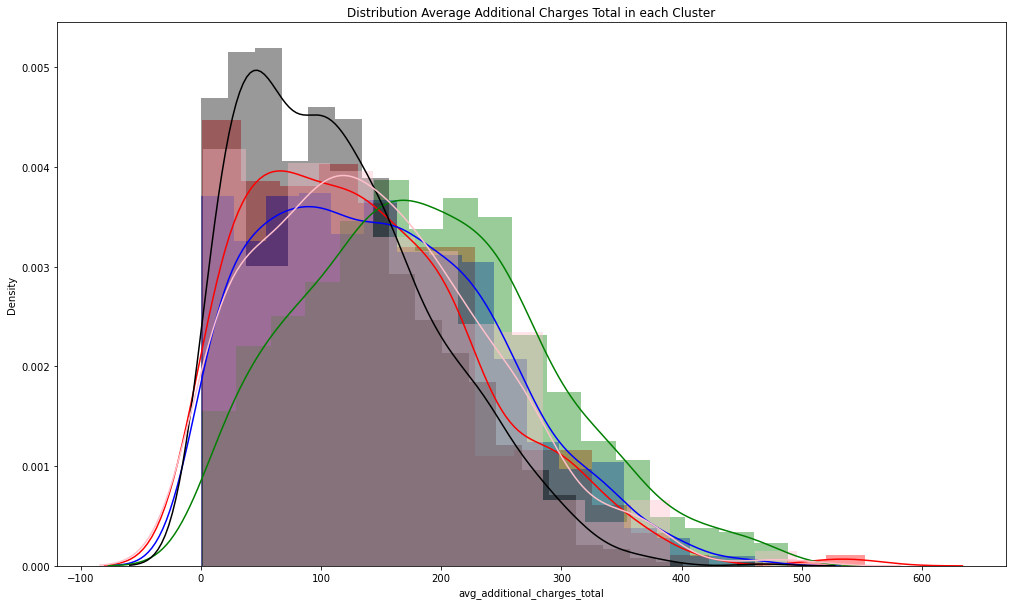

In [30]:
plt.figure(figsize=(17, 10))
plt.title ('Distribution Average Additional Charges Total in each Cluster')
sns.distplot(df_1[df_1['label'] == '0']['avg_additional_charges_total'], color = 'Red')
sns.distplot(df_1[df_1['label'] == '1']['avg_additional_charges_total'], color = 'Blue')
sns.distplot(df_1[df_1['label'] == '2']['avg_additional_charges_total'], color = 'Green')
sns.distplot(df_1[df_1['label'] == '3']['avg_additional_charges_total'], color = 'Black')
sns.distplot(df_1[df_1['label'] == '4']['avg_additional_charges_total'], color = 'Pink')
plt.show()

The distribution of the parameter additional charges are quiet similar in all clusters

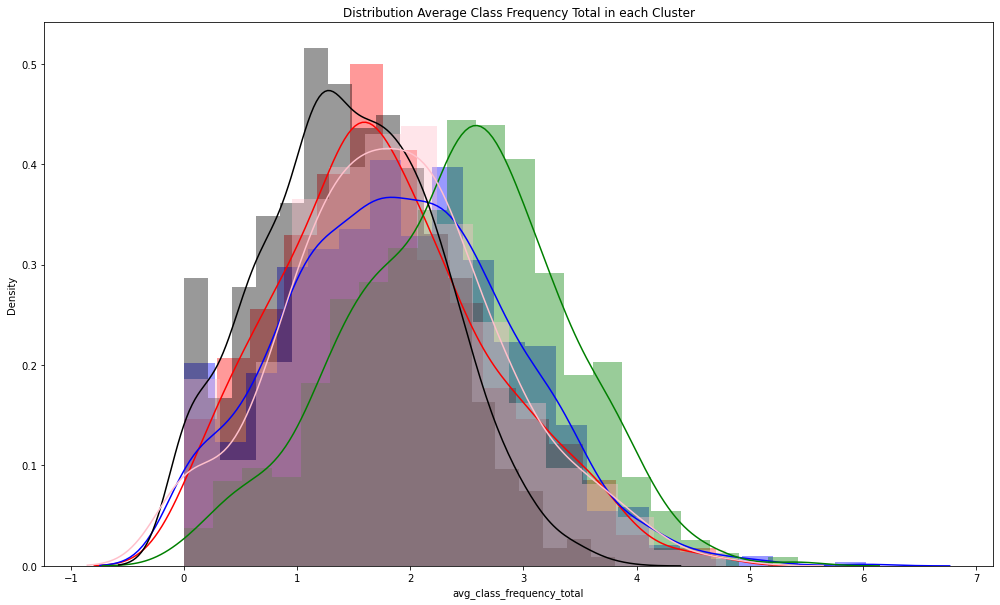

In [31]:
plt.figure(figsize=(17, 10))
plt.title ('Distribution Average Class Frequency Total in each Cluster')
sns.distplot(df_1[df_1['label'] == '0']['avg_class_frequency_total'], color = 'Red')
sns.distplot(df_1[df_1['label'] == '1']['avg_class_frequency_total'], color = 'Blue')
sns.distplot(df_1[df_1['label'] == '2']['avg_class_frequency_total'], color = 'Green')
sns.distplot(df_1[df_1['label'] == '3']['avg_class_frequency_total'], color = 'Black')
sns.distplot(df_1[df_1['label'] == '4']['avg_class_frequency_total'], color = 'Pink')
plt.show()

The distribution of the parameter differs between the cluster with the highest density between 1 (label 3) and 3 (label 2) vists per week

In [32]:
#creating df for each label
label_0=df_1[df_1.label == '0']
label_1=df_1[df_1.label == '1']
label_2=df_1[df_1.label == '2']
label_3=df_1[df_1.label == '3']
label_4=df_1[df_1.label == '4']

In [33]:
#calculating the churn rate for each cluster
print('Cluster 1')
shift0 = label_0.groupby(['churn'])['label'].count().reset_index()
shift0['perc'] = (shift0['label']/sum(shift0['label'])*100).round(2)
shift0['perc_change'] = (shift0['label'].pct_change() * 100).round(2)
display(shift0)
print('Cluster 2')
shift1 = label_1.groupby(['churn'])['label'].count().reset_index()
shift1['perc'] = (shift0['label']/sum(shift1['label'])*100).round(2)
shift1['perc_change'] = (shift1['label'].pct_change() * 100).round(2)
display(shift1)
print('Cluster 3')
shift2 = label_2.groupby(['churn'])['label'].count().reset_index()
shift2['perc'] = (shift2['label']/sum(shift2['label'])*100).round(2)
shift2['perc_change'] = (shift2['label'].pct_change() * 100).round(2)
display(shift2)
print('Cluster 4')
shift3 = label_3.groupby(['churn'])['label'].count().reset_index()
shift3['perc'] = (shift3['label']/sum(shift3['label'])*100).round(2)
shift3['perc_change'] = (shift3['label'].pct_change() * 100).round(2)
display(shift3)
print('Cluster 5')
shift4 = label_4.groupby(['churn'])['label'].count().reset_index()
shift4['perc'] = (shift4['label']/sum(shift4['label'])*100).round(2)
shift4['perc_change'] = (shift4['label'].pct_change() * 100).round(2)
display(shift4)


Cluster 1


churn  label   perc  perc_change
0      0    335  59.93          NaN
1      1    224  40.07       -33.13

Cluster 2


churn  label   perc  perc_change
0      0    941  31.43          NaN
1      1    125  21.01       -86.72

Cluster 3


churn  label  perc  perc_change
0      0    895  97.6          NaN
1      1     22   2.4       -97.54

Cluster 4


churn  label   perc  perc_change
0      0    485  45.24          NaN
1      1    587  54.76        21.03

Cluster 5


churn  label   perc  perc_change
0      0    283  73.32          NaN
1      1    103  26.68        -63.6

Creating dendogram for each churn to find out - how many clusters should be used (4 clusters and 6 clusters are shown - therefore i choose 5 clusters). Then the users are clustered into 5 labels and this labels are added to df_1.

By comparing the mean features of the different clusters - age, gender and average of additional charges are more and less very similar. Only in one cluster (label = 0) there are no locals. The second cluster used the highest number of promotional friends offering,  but this cluster has the highest number of partner contracts and the longes contract periods with a low churn rate. Only the label with the number 4 has no phone number mentioned. The lowest mean churn rate can be found in the cluster with the label 3, with the highest lieftim and highest average visiting frequencies. The highest churn rate can be found in the cluster with the label 3 (0.55) with the shortes lifetime and fewer visits per week, but with a contract period in average aboutn 4.8 months.

The density of the lifetime is the highest in the 4th cluster with the label 3 by around 2 months. In contrast to label 2 with the highest density at about 5 months. The distribution in age is very similar in all of the clusters, with tiny differences of +-5 years.
The highest density for contract period is found in the cluster with the label 3 with a contract period of about 1 month. The distribution of the parameter additional charges are quiet similar in all clusters. The distribution of the parameter differs between the cluster with the highest density between 1 (label 3) and 3 (label 2) vists per week.


Which clusters are prone to leaving, and which are loyal?
The most loyal cluster group is the label 3, with only 2.4% are leaving. The highest churn rate can be found in cluster 4, where 21 per cent of more people leave than stays in the gy. 

## Step 5. Come up with conclusions and basic recommendations on working with customers


The mean customer who stays are locals and get a contract via partner business, with a contract period of nearly 6 month and is around 30 years olt. Additional charges are made around 158,-- and the client has a remaining contract duration of a bit more than 5 month with a lifetime of more than 4.5 months and visits the gyms around twice the week and was twice the month before. 

The factors that impact churn most are again lifetime (0.33) and the frequency of training every week and the period of the contract duration. This is found out via the Random Forrest Classifier (e.g. lifetime has an impact of 0.33) and differencing the clients into clusters and by comparing them. The cluster with highest rate of remaining costumer is the cluster with the highest density in lifetime and the longest ontract periode and highest average visiting frequency 

The target group can be mainly found in the cluster group 3: locals with a longer contract duration and higher frequency of visiting - clu
One measure should be offering a discount on long time contract and to attract user with a frequent visiting per week, by offering a bonus program sales. Therefore the customers are younger, you should offer a tracking app or something similar to facilitäte the tracking of the training - it can be also used as a bonus program sales.